In [1]:
import numpy as np

### Load Database

In [2]:
data = np.load('ORL_faces.npz')

In [3]:
type(data)

numpy.lib.npyio.NpzFile

In [4]:
list1 = data.files

In [5]:
print(data.files)

['testY', 'testX', 'trainX', 'trainY']


In [6]:
type(list1)

list

In [7]:
list1[0]

'testY'

In [8]:
list1[1]

'testX'

In [9]:
type(list1[1])

str

In [10]:
for item in list1:
    print(item)

testY
testX
trainX
trainY


In [11]:
from matplotlib import pyplot as plt

In [12]:
trainX = data['trainX']
trainY = data['trainY']
testX = data['testX']
testY = data['testY']

In [13]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(240, 10304) (160, 10304) (240,) (160,)


In [14]:
#Images are of size 112x92 as given in the problem statement
112*92

10304

In [15]:
trainX = trainX.reshape(trainX.shape[0],112,92,1)
testX = testX.reshape(testX.shape[0], 112,92,1)

In [16]:
trainX /= 255.
testX /= 255. 

#### Count the total number of unique persons and count of their images 

In [17]:
unique, counts = np.unique(trainY, return_counts=True)

In [18]:
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]


In [19]:
unique_test, count_test = np.unique(testY, return_counts=True)
print(unique_test, count_test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


### Plot sample images

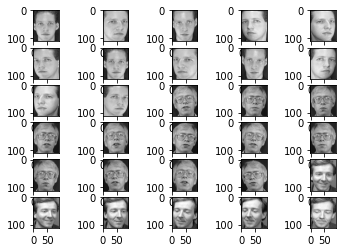

In [20]:
plt.subplots(6,5)
plt.rcParams['figure.figsize'] = (20,20)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(trainX[i], cmap = 'gray')

In [21]:
trainY

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

### One hot encoding the output

In [22]:
from keras.utils import np_utils

In [23]:
trainY=np_utils.to_categorical(trainY)
testY=np_utils.to_categorical(testY)

### Model Building

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras
from tensorflow.keras.optimizers import Adadelta, Adam
from keras.callbacks import ModelCheckpoint
from keras.metrics import Precision, Recall

In [25]:
from keras.layers import BatchNormalization

In [26]:
adadelta = Adadelta(learning_rate=0.2, rho = 0.9)

In [27]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), input_shape = (112,92,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = None)) #None = pool_size = (2,2)

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = None))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = None))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = None))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(20,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=adadelta,metrics=['accuracy',Precision(),Recall()])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 88, 16)       416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 44, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 7, 128)        7

### Model Checkpoint

In [29]:
filepath = 'weights_best_model3_11.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor = 'val_accuracy',verbose = 1, save_best_only=True, mode='max')

### Model training

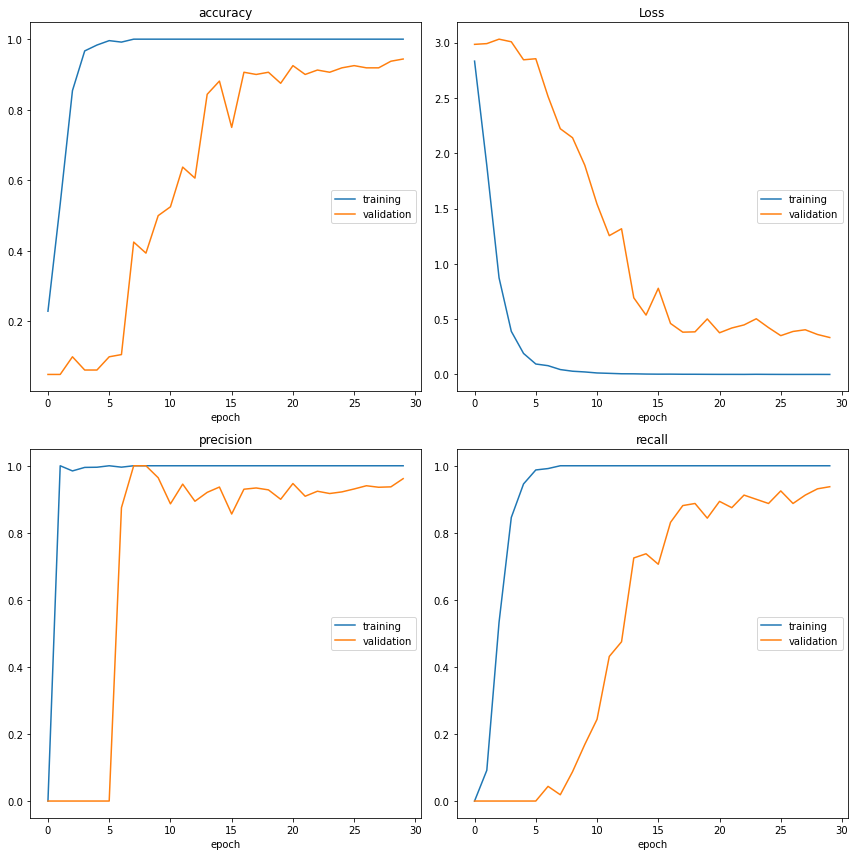

accuracy
	training         	 (min:    0.229, max:    1.000, cur:    1.000)
	validation       	 (min:    0.050, max:    0.944, cur:    0.944)
Loss
	training         	 (min:    0.000, max:    2.832, cur:    0.000)
	validation       	 (min:    0.334, max:    3.031, cur:    0.334)
precision
	training         	 (min:    0.000, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    1.000, cur:    0.962)
recall
	training         	 (min:    0.000, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    0.938, cur:    0.938)

Epoch 00030: val_accuracy improved from 0.93750 to 0.94375, saving model to weights_best_model3_11.hdf5


In [30]:
model.fit(trainX,trainY,epochs=30,batch_size=8,validation_data=(testX,testY),callbacks=[PlotLossesKeras(), checkpoint])

### Save the model

In [31]:
model.save("./model3_11")

INFO:tensorflow:Assets written to: ./model3_11\assets
